In [61]:
import pandas as pd
from matplotlib import pyplot as pt
import seaborn as sea




In [62]:
data = pd.read_csv("/Users/jarvis/pymycod/NSCC_Tasks/globalterrorismdb_0718dist.csv",na_values="?",encoding="ISO-8859-1")

/var/folders/g_/c4f93b1s3sb7z3s30n19hdzh0000gn/T/ipykernel_52519/3474694424.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/jarvis/pymycod/NSCC_Tasks/globalterrorismdb_0718dist.csv",na_values="?",encoding="ISO-8859-1")


In [63]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [65]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [66]:
data = data.fillna(0)

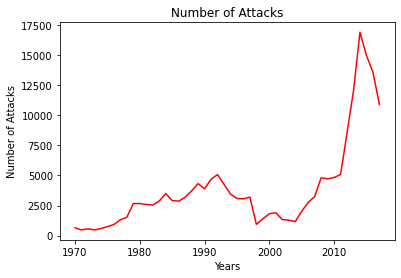

In [67]:
years = data.groupby('iyear').size().reset_index(name='count')
sea.lineplot(x='iyear', y='count', data=years, color= "red")
pt.xlabel('Years')
pt.ylabel('Number of Attacks')
pt.title('Number of Attacks')
pt.show()

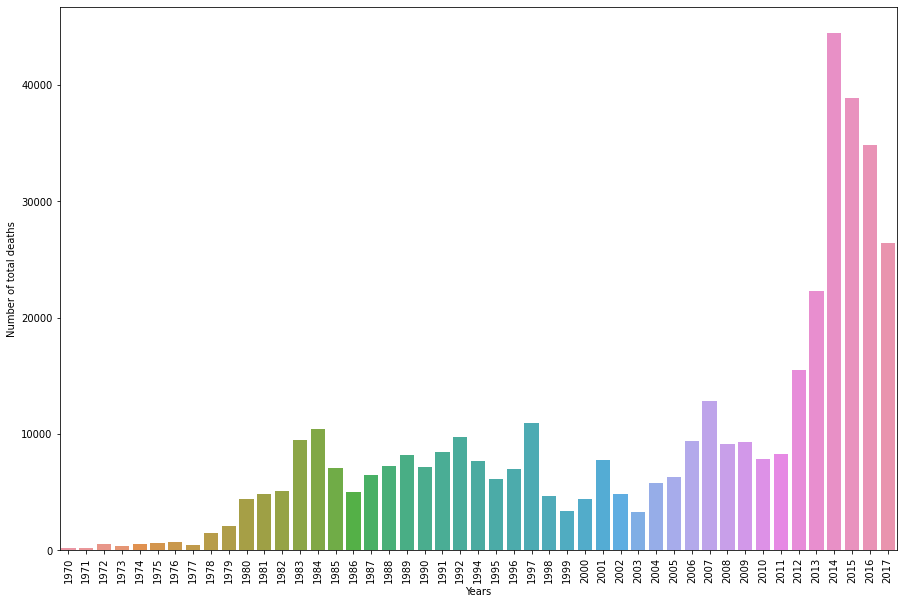

In [68]:
tot_kills = data.groupby('iyear')['nkill'].sum()
pt.subplots(figsize=(15,10))
plot = sea.barplot(x =tot_kills.index,y=tot_kills)
plot.set_ylabel("Number of total deaths")
plot.set_xlabel("Years")
plot.set_xticklabels(tot_kills.index,rotation=90)
pt.show()

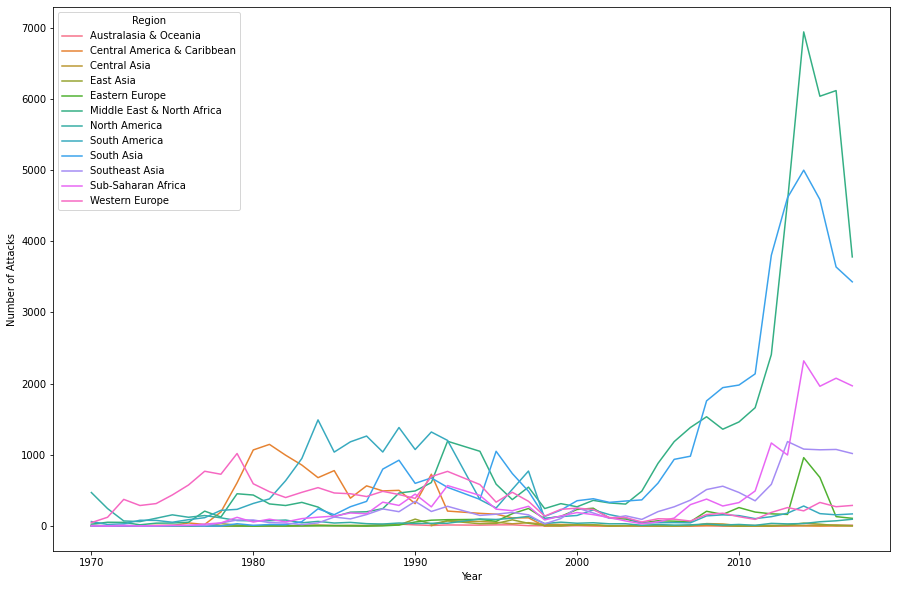

In [69]:

def attacks_region(data):
    pt.figure(figsize=(15, 10))
    datas = data.groupby(['region_txt', 'iyear'])['iyear'].count().reset_index(name='Number of Attacks')
    sea.lineplot(data=datas, x='iyear', y='Number of Attacks', hue='region_txt')
    pt.xlabel("Year")
    pt.legend(title='Region', loc='upper left')
    pt.show()
    
attacks_region(data)


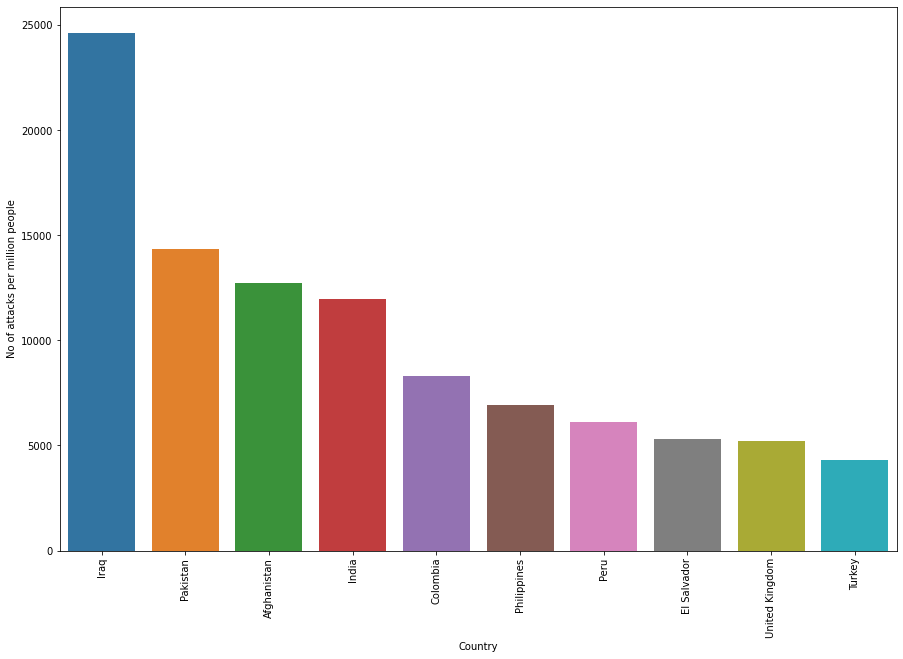

In [70]:
pt.subplots(figsize=(15,10))
countries = pd.DataFrame(data['country_txt'].value_counts()[:10])
countries.reset_index(inplace=True)
countries.columns = ['Country','No of attacks per million people']
p2 = sea.barplot(x=countries['Country'],y=countries['No of attacks per million people'])
p2.set_xticklabels(countries['Country'],rotation=90)
pt.show()


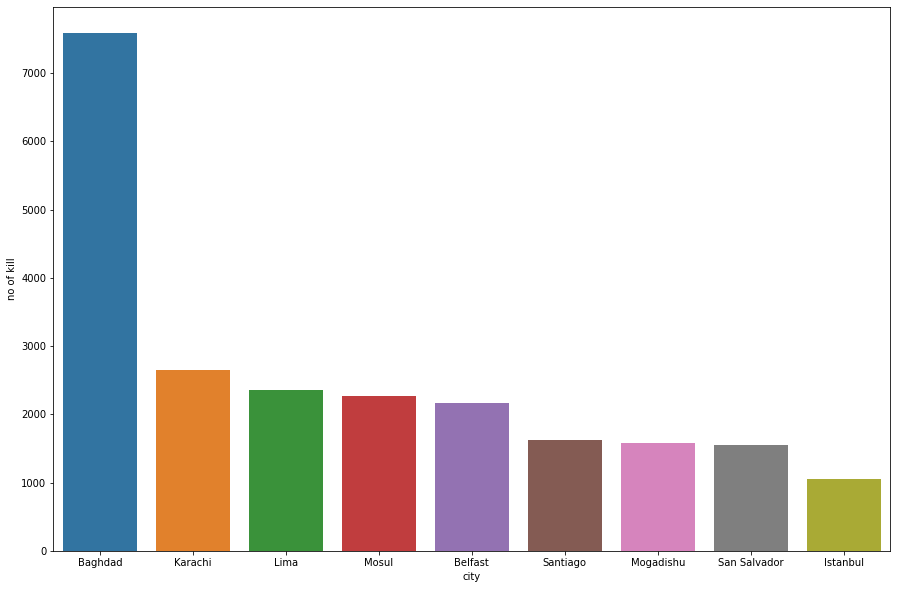

In [71]:
pt.subplots(figsize=(15,10))
cities = pd.DataFrame(data['city'].value_counts()[1:10])
cities.reset_index(inplace=True)
cities.columns = ['city','no of kill']
p2 = sea.barplot(x=cities['city'],y=cities['no of kill'])
pt.show()

Text(0.5, 1.0, 'Success rate')

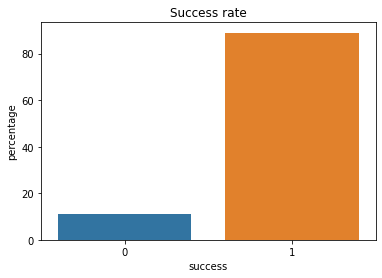

In [72]:
total_count = data['success'].count()
success = data.groupby('success').size().reset_index(name="count")
success['percentage'] = (success['count'] / total_count) * 100
sea.barplot(x='success', y= 'percentage',data = success)
pt.title('Success rate')